In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
!pip install "torch == 1.4.0" "torchvision==0.5.0"

In [3]:
from pathlib import Path
%pylab inline
from fastai.vision import *
import pandas as pd
path =Path('/content/drive/My Drive/dataset/all/')


Populating the interactive namespace from numpy and matplotlib


In [0]:
data = ImageDataBunch.from_folder(path/'train', train='train', valid_pct=0.2, ds_tfms=get_transforms(), size=(256,256), bs=10, num_workers=4).normalize()

In [5]:
data

ImageDataBunch;

Train: LabelList (160 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
normal,normal,normal,normal,normal
Path: /content/drive/My Drive/dataset/all/train;

Valid: LabelList (40 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
covid,pneumonia_bac,pneumonia_bac,pneumonia_bac,normal
Path: /content/drive/My Drive/dataset/all/train;

Test: None

In [0]:
custom_head = nn.Sequential(
    AdaptiveConcatPool2d((4,4)),
    Flatten(),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(65536,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    nn.Linear(256,3))

In [0]:
learn=cnn_learner(data, models.resnet50, custom_head=custom_head, loss_func=nn.CrossEntropyLoss(), metrics=[accuracy])

In [8]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 128, 128]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 128, 128]       128        True      
______________________________________________________________________
ReLU                 [64, 128, 128]       0          False     
______________________________________________________________________
MaxPool2d            [64, 64, 64]         0          False     
______________________________________________________________________
Conv2d               [64, 64, 64]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 64, 64]         128        True      
______________________________________________________________________
Conv2d               [64, 64, 64]         36,864     False     
___________________________________________________

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


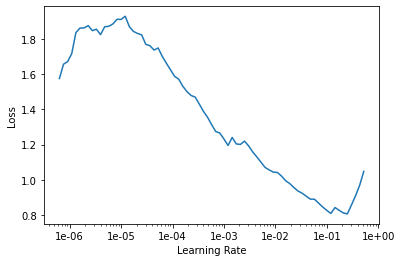

In [10]:
learn.recorder.plot()

In [0]:
learn.freeze()

In [12]:
lr=1e-2
learn.fit_one_cycle(10, slice(lr/10, lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.573395,3.449955,0.475000,00:12
1,0.449341,0.158933,0.925000,00:12
2,0.312355,0.194079,0.900000,00:12
3,0.270125,0.099897,0.950000,00:12
4,0.227036,0.148836,0.950000,00:12
5,0.179980,0.142639,0.975000,00:12
6,0.176870,0.111695,0.950000,00:12
7,0.142705,0.092797,0.950000,00:11
8,0.188642,0.069851,0.950000,00:12
9,0.174104,0.067374,0.975000,00:12


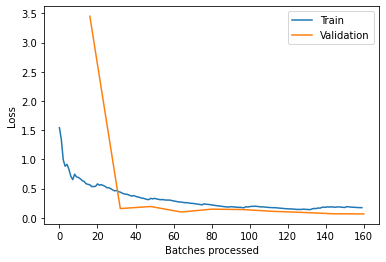

In [13]:
learn.recorder.plot_losses()

In [0]:
learn.unfreeze()

In [15]:
lr=1e-3
learn.fit_one_cycle(10, slice(lr/10, lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.079857,0.054045,0.975000,00:12
1,0.146110,0.146062,0.925000,00:12
2,0.252057,0.278255,0.900000,00:12
3,0.308002,0.402790,0.825000,00:12
4,0.370669,0.026572,1.000000,00:12
5,0.368278,0.512622,0.900000,00:12
6,0.299517,0.157443,0.950000,00:12
7,0.277712,0.114350,0.950000,00:12
8,0.277837,0.087057,0.975000,00:12
9,0.238172,0.080164,1.000000,00:12


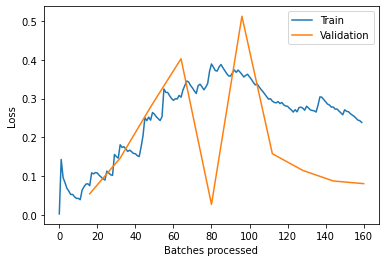

In [16]:
learn.recorder.plot_losses()

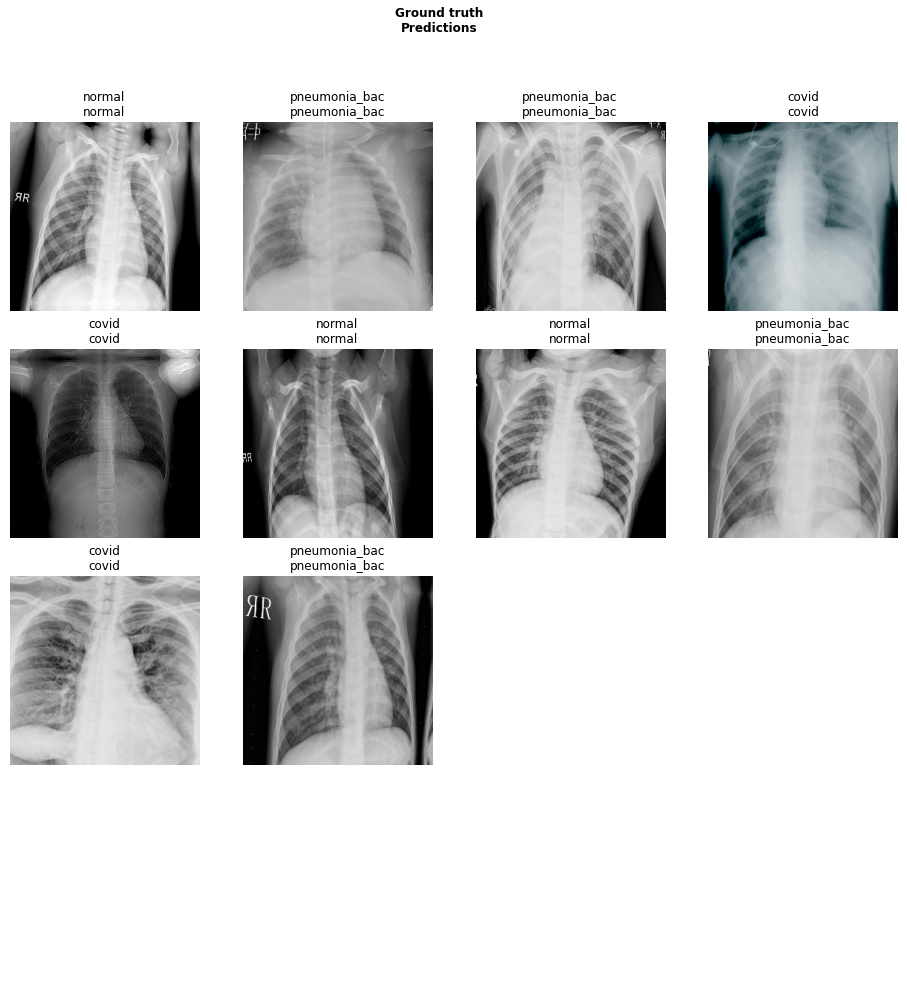

In [17]:
learn.show_results(ds_type=DatasetType.Train)

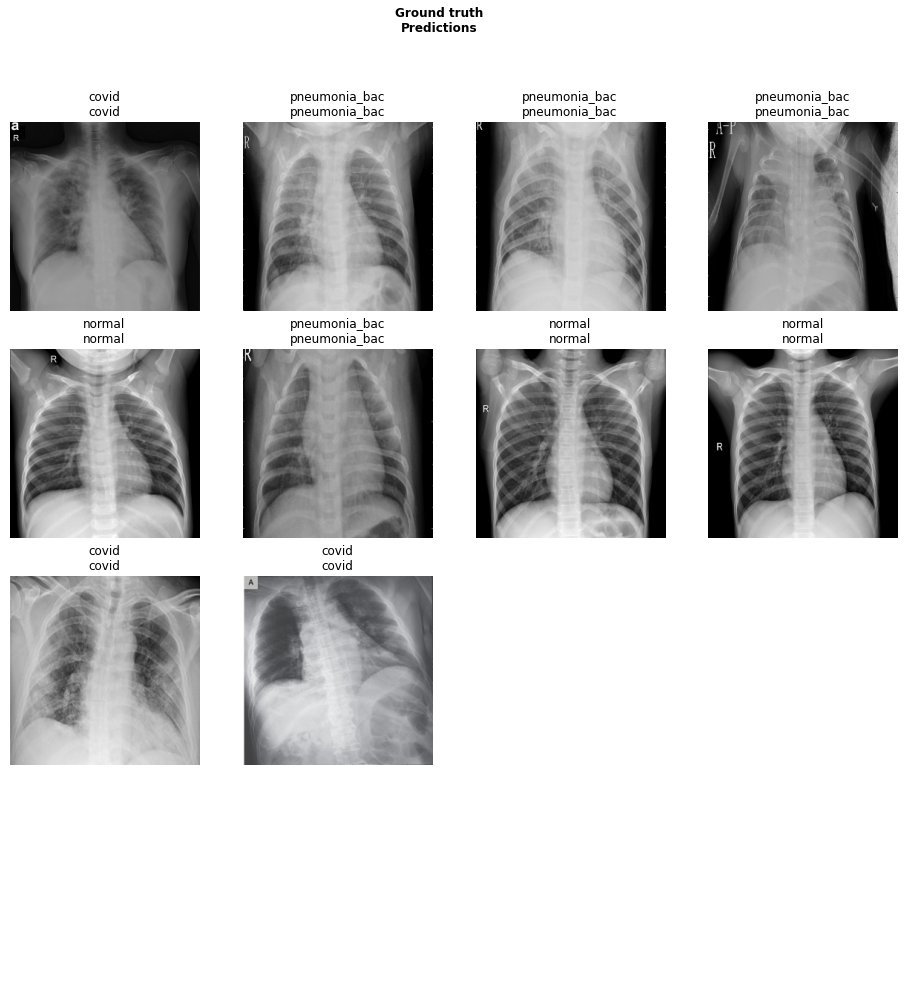

In [18]:
learn.show_results(ds_type=DatasetType.Valid)

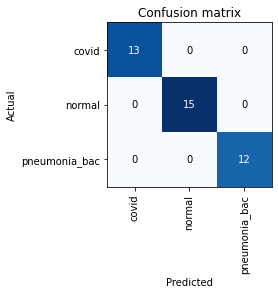

In [19]:
#### between train vs validation data 
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [0]:
learn.export()  

In [21]:
learn.path

PosixPath('/content/drive/My Drive/dataset/all/train')

In [0]:
classes=['covid','normal','pneumonia_bac']

In [23]:
data.classes

['covid', 'normal', 'pneumonia_bac']

In [0]:
img=open_image(path/'test/covid/nejmoa2001191_f3-PA.jpeg')

In [0]:
img1=open_image(path/'test/covid/nejmoa2001191_f4.jpeg')
img2=open_image(path/'test/covid/nejmoa2001191_f5-PA.jpeg')
img3=open_image(path/'test/covid/radiol.2020200490.fig3.jpeg')
img4=open_image(path/'test/covid/ryct.2020200028.fig1a.jpeg')
img5=open_image(path/'test/covid/ryct.2020200034.fig2.jpeg')
img6=open_image(path/'test/covid/ryct.2020200034.fig5-day0.jpeg')
img7=open_image(path/'test/covid/ryct.2020200034.fig5-day4.jpeg')
img8=open_image(path/'test/covid/ryct.2020200034.fig5-day7.jpeg')
img9=open_image(path/'test/normal/NORMAL2-IM-1423-0001.jpeg')
img10=open_image(path/'test/normal/NORMAL2-IM-1385-0001.jpeg')
img11=open_image(path/'test/normal/NORMAL2-IM-1396-0001.jpeg')
img12=open_image(path/'test/normal/NORMAL2-IM-1400-0001.jpeg')
img13=open_image(path/'test/normal/NORMAL2-IM-1401-0001.jpeg')
img14=open_image(path/'test/normal/NORMAL2-IM-1406-0001.jpeg')
img15=open_image(path/'test/normal/NORMAL2-IM-1412-0001.jpeg')
img16=open_image(path/'test/normal/NORMAL2-IM-1419-0001.jpeg')
img17=open_image(path/'test/normal/NORMAL2-IM-1422-0001.jpeg')
img18=open_image(path/'test/pneumonia_bac/person1753_bacteria_4594.jpeg')
img19=open_image(path/'test/pneumonia_bac/person1940_bacteria_4859.jpeg')
img20=open_image(path/'test/pneumonia_bac/person1940_bacteria_4861.jpeg')
img21=open_image(path/'test/pneumonia_bac/person1940_bacteria_4862.jpeg')
img22=open_image(path/'test/pneumonia_bac/person1941_bacteria_4863.jpeg')
img23=open_image(path/'test/pneumonia_bac/person1942_bacteria_4865.jpeg')
img24=open_image(path/'test/pneumonia_bac/person1943_bacteria_4868.jpeg')
img25=open_image(path/'test/pneumonia_bac/person1944_bacteria_4869.jpeg')
img26=open_image(path/'test/pneumonia_bac/person1945_bacteria_4872.jpeg')


In [0]:
testing=load_learner(path/'train')

In [0]:
images=[img,img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,img11,img12,img13,img14,img15,img16,img17,img18,img19,img20,img21,img22,img23,img24,img25,img26]

In [0]:
original=['covid','covid','covid','covid','covid','covid','covid','covid','covid','normal','normal','normal','normal','normal','normal','normal','normal','normal','pneumonia_bac','pneumonia_bac','pneumonia_bac','pneumonia_bac','pneumonia_bac','pneumonia_bac','pneumonia_bac','pneumonia_bac','pneumonia_bac']

In [0]:
predictions=[]
for i in images:
  pred_class,pred_idx,outputs = testing.predict(i)
  predictions.append(pred_idx)

In [30]:
predictions

[tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(2),
 tensor(1),
 tensor(2),
 tensor(2),
 tensor(2),
 tensor(2),
 tensor(2),
 tensor(2),
 tensor(2),
 tensor(2),
 tensor(2)]

In [0]:
predclass=[]
for i in predictions:
  predclass.append(data.classes[i])

In [32]:
predclass

['covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'pneumonia_bac',
 'normal',
 'pneumonia_bac',
 'pneumonia_bac',
 'pneumonia_bac',
 'pneumonia_bac',
 'pneumonia_bac',
 'pneumonia_bac',
 'pneumonia_bac',
 'pneumonia_bac',
 'pneumonia_bac']

In [0]:
from sklearn.metrics import accuracy_score
acc=round(((accuracy_score(original, predclass))*100),2)

In [34]:
print("Test accuracy is : "+str(acc)+"%" )

Test accuracy is : 96.3%
